In [3]:
import cv2
import numpy as np
from pathlib import Path
# import dataFrameTools
import pandas as pd
from random import randrange
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
temp =pd.read_csv("../Data/clip_sBIKED_reduced.csv", index_col=0)
temp

,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,BB diameter,...,FIRST color B_RGB,RIM_STYLE front,RIM_STYLE rear,SPOKES composite front,SBLADEW front,SBLADEW rear,Saddle length,Saddle height,Down tube diameter,Seatpost LENGTH
1,430.00,67.000000,565.6,73.000000,135.6,45.0,588.7,72.500000,664.020690,40.0,...,0,SPOKED,SPOKED,1,80.0,80.0,298.0,768.0,34.9,300.0
2,350.00,-14.500000,565.6,71.500000,80.0,45.0,265.0,71.500000,572.491950,40.0,...,204,SPOKED,SPOKED,1,80.0,80.0,240.0,330.0,40.0,100.0
3,415.00,4.000000,565.6,72.000000,198.8,45.0,562.0,74.000000,647.103654,38.1,...,255,SPOKED,SPOKED,1,80.0,80.0,278.0,763.0,35.0,300.0
4,375.00,50.000000,565.6,70.500000,91.8,40.0,460.0,73.500000,573.904093,38.1,...,255,SPOKED,SPOKED,1,80.0,80.0,298.0,600.0,28.6,140.0
5,431.79,24.000000,565.6,72.100000,83.1,41.0,300.0,72.500000,636.179297,40.0,...,204,SPOKED,SPOKED,1,80.0,80.0,210.0,350.0,45.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,410.00,75.000000,552.0,72.500000,145.0,125.0,520.0,74.000000,644.551458,40.0,...,151,SPOKED,SPOKED,1,80.0,80.0,275.0,710.0,50.0,320.0
4797,419.00,42.909345,598.9,65.772099,95.0,90.0,380.0,77.772099,704.278730,40.0,...,102,SPOKED,SPOKED,1,80.0,80.0,278.0,720.0,38.0,465.0
4798,410.00,-11.500000,492.5,72.000000,250.0,45.0,550.0,74.000000,547.934671,40.0,...,102,TRISPOKE,TRISPOKE,3,40.0,40.0,298.0,740.0,34.9,330.0
4799,410.00,-11.500000,500.0,72.000000,280.4,45.0,550.0,74.000532,542.387502,40.0,...,102,TRISPOKE,SPOKED,3,40.0,40.0,298.0,740.0,34.9,330.0


In [4]:
visual_df =pd.read_csv("../Data/clip_sBIKED_reduced.csv", index_col=0)
columns_to_drop = [col for col in visual_df.columns if 'color' in col]
visual_df.drop(columns=columns_to_drop, inplace=True)
boolean_columns = visual_df.select_dtypes(include=['bool']).columns
visual_df[boolean_columns] = visual_df[boolean_columns].astype(int)
visual_df = visual_df.sort_index(axis=1)
visual_df = visual_df.select_dtypes(include=['number'])

print(f'Len columns: {len(visual_df.columns)}')
visual_df = visual_df.loc[:, (visual_df != visual_df.iloc[0]).any()]
print(f'Len columns non constant: {len(visual_df.columns)}')


rated_bikes_df = pd.read_csv("processed_ratings.csv")

all_my_bikes_df = visual_df.loc[rated_bikes_df['bid'].unique()]

Len columns: 65
Len columns non constant: 61


In [5]:
average_ratings = rated_bikes_df.groupby('bid')['rating'].mean()
usable_bikes = visual_df.loc[average_ratings[average_ratings > 0.7].index]
unusable_bikes = visual_df.loc[average_ratings[average_ratings < 0.3].index]
meaningfull_bikes_df = pd.concat([usable_bikes, unusable_bikes])
meaningfull_bikes_df['usable'] = meaningfull_bikes_df.index.isin(usable_bikes.index).astype(int)

In [6]:
def plot_bins(dataframe, output_prefix, bins=10, columns_per_row=6):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    n_cols = len(numeric_columns)
    n_rows = (n_cols + columns_per_row - 1) // columns_per_row  # Ceiling division
    fig, axs = plt.subplots(n_rows, columns_per_row, figsize=(20, n_rows * 4))
    axs = axs.flatten()  # Flatten to make indexing easier

    # Loop through numeric columns and plot histograms
    for idx, col in enumerate(numeric_columns):
        axs[idx].hist(dataframe[col].dropna(), bins=bins)  # Drop NA values for histogram
        axs[idx].set_title(f'{col}')
        axs[idx].set_ylabel('Frequency')
        axs[idx].grid(True)  
    for ax in axs[n_cols:]:
        ax.axis('off')
    
    # Adjust layout and save the figure
    plt.tight_layout()

    plt.savefig(f'../{output_prefix}.pdf', format='pdf')
    plt.show()
    plt.close()



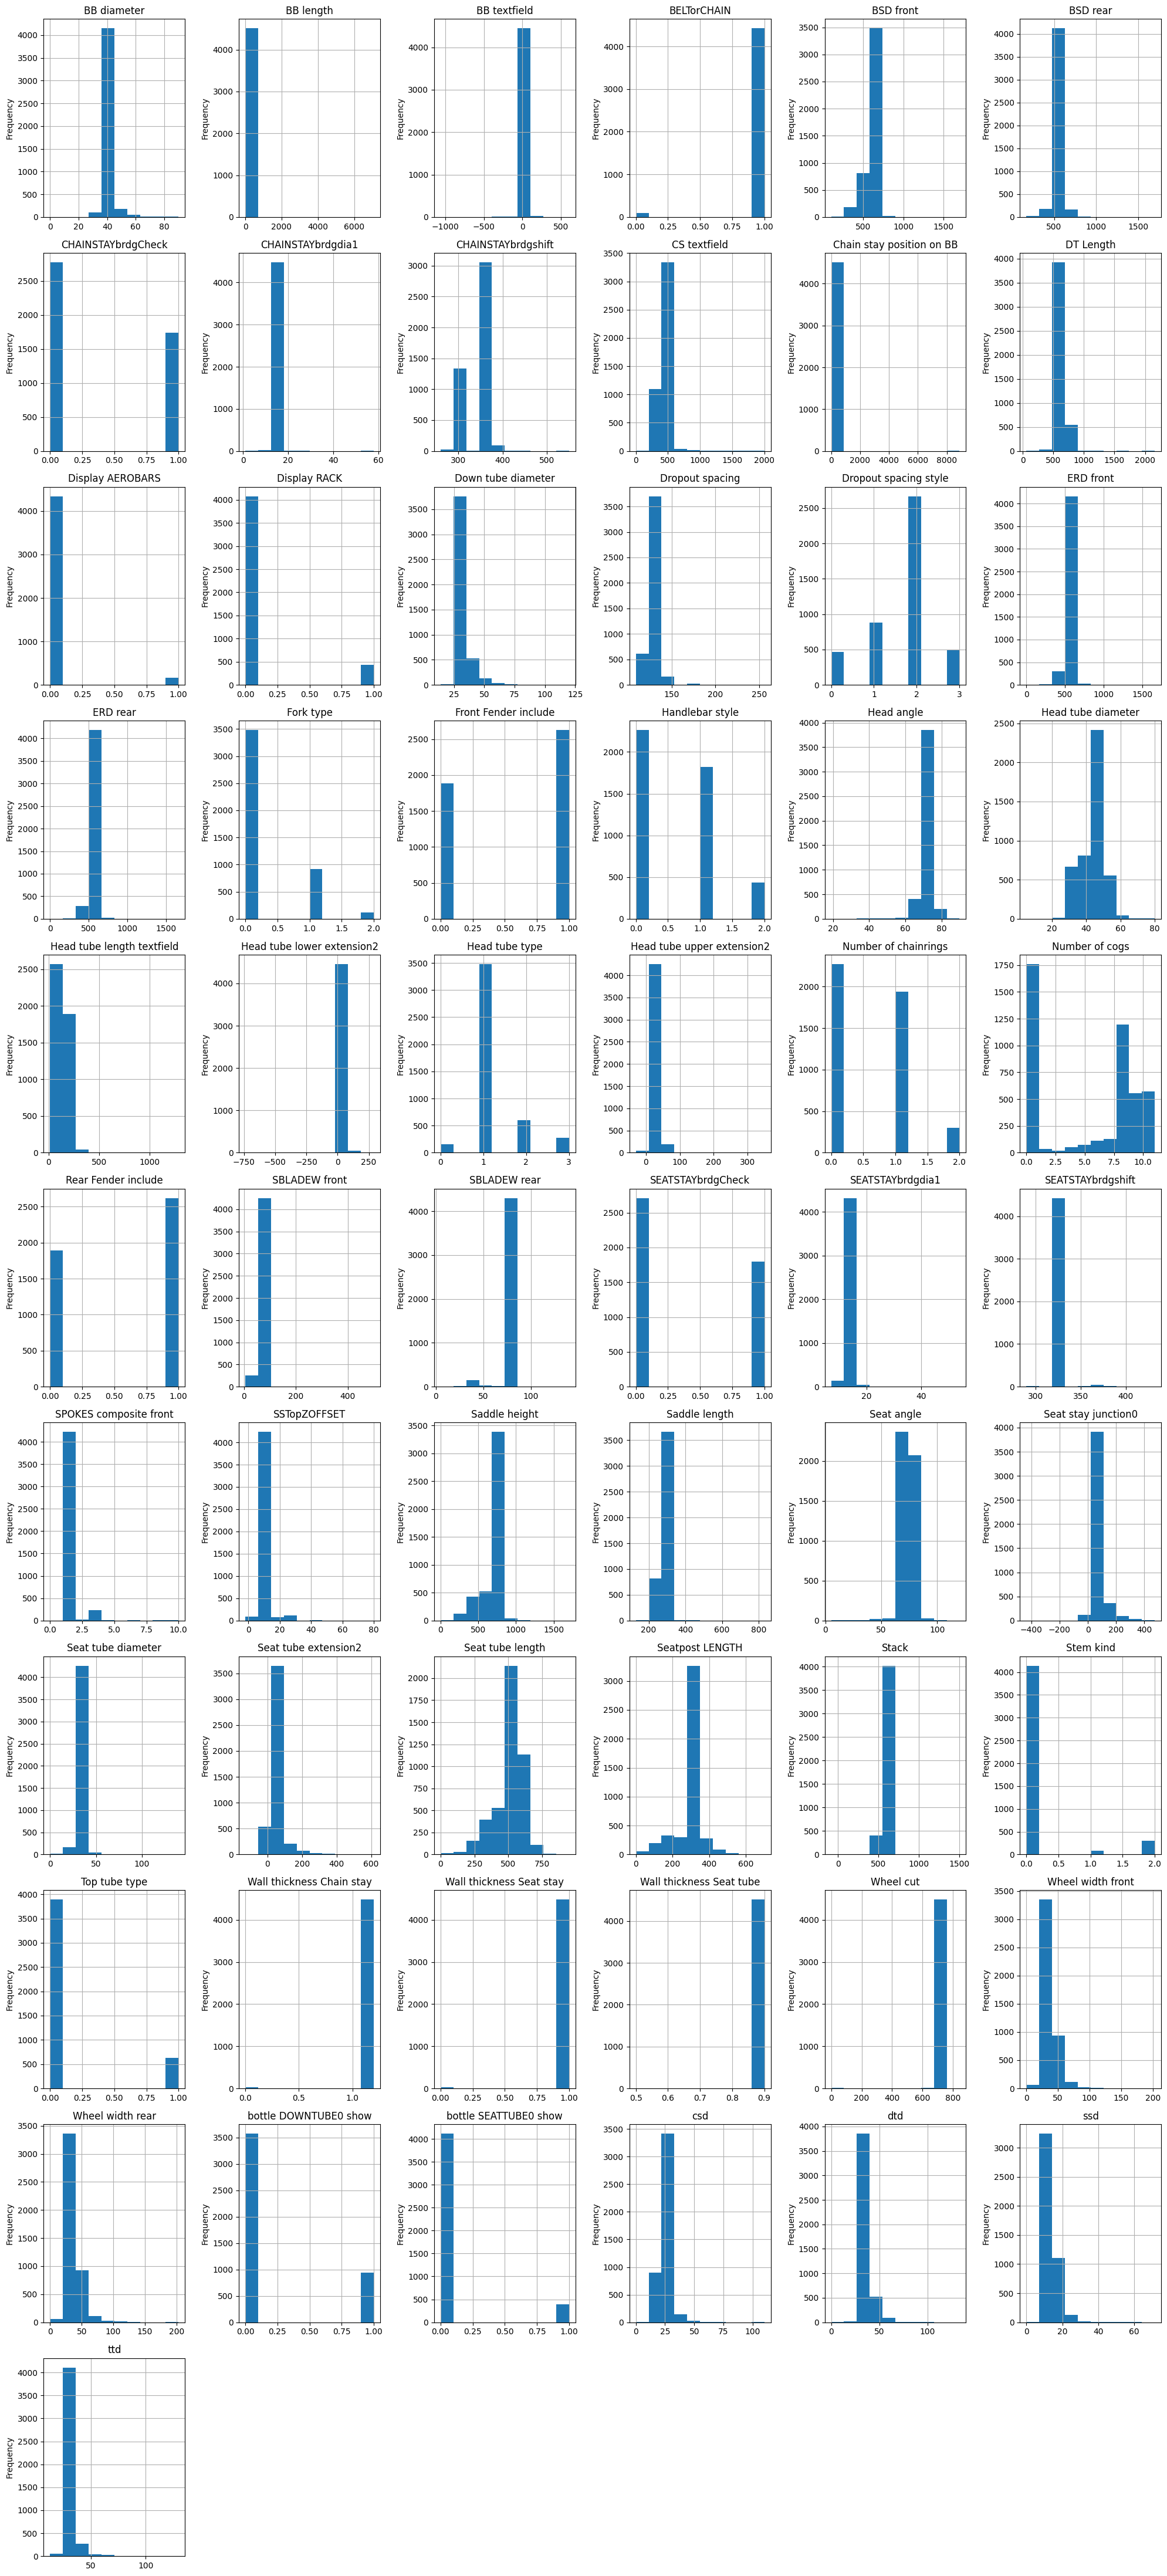

In [8]:
plot_bins(visual_df, "BIKED_hist")


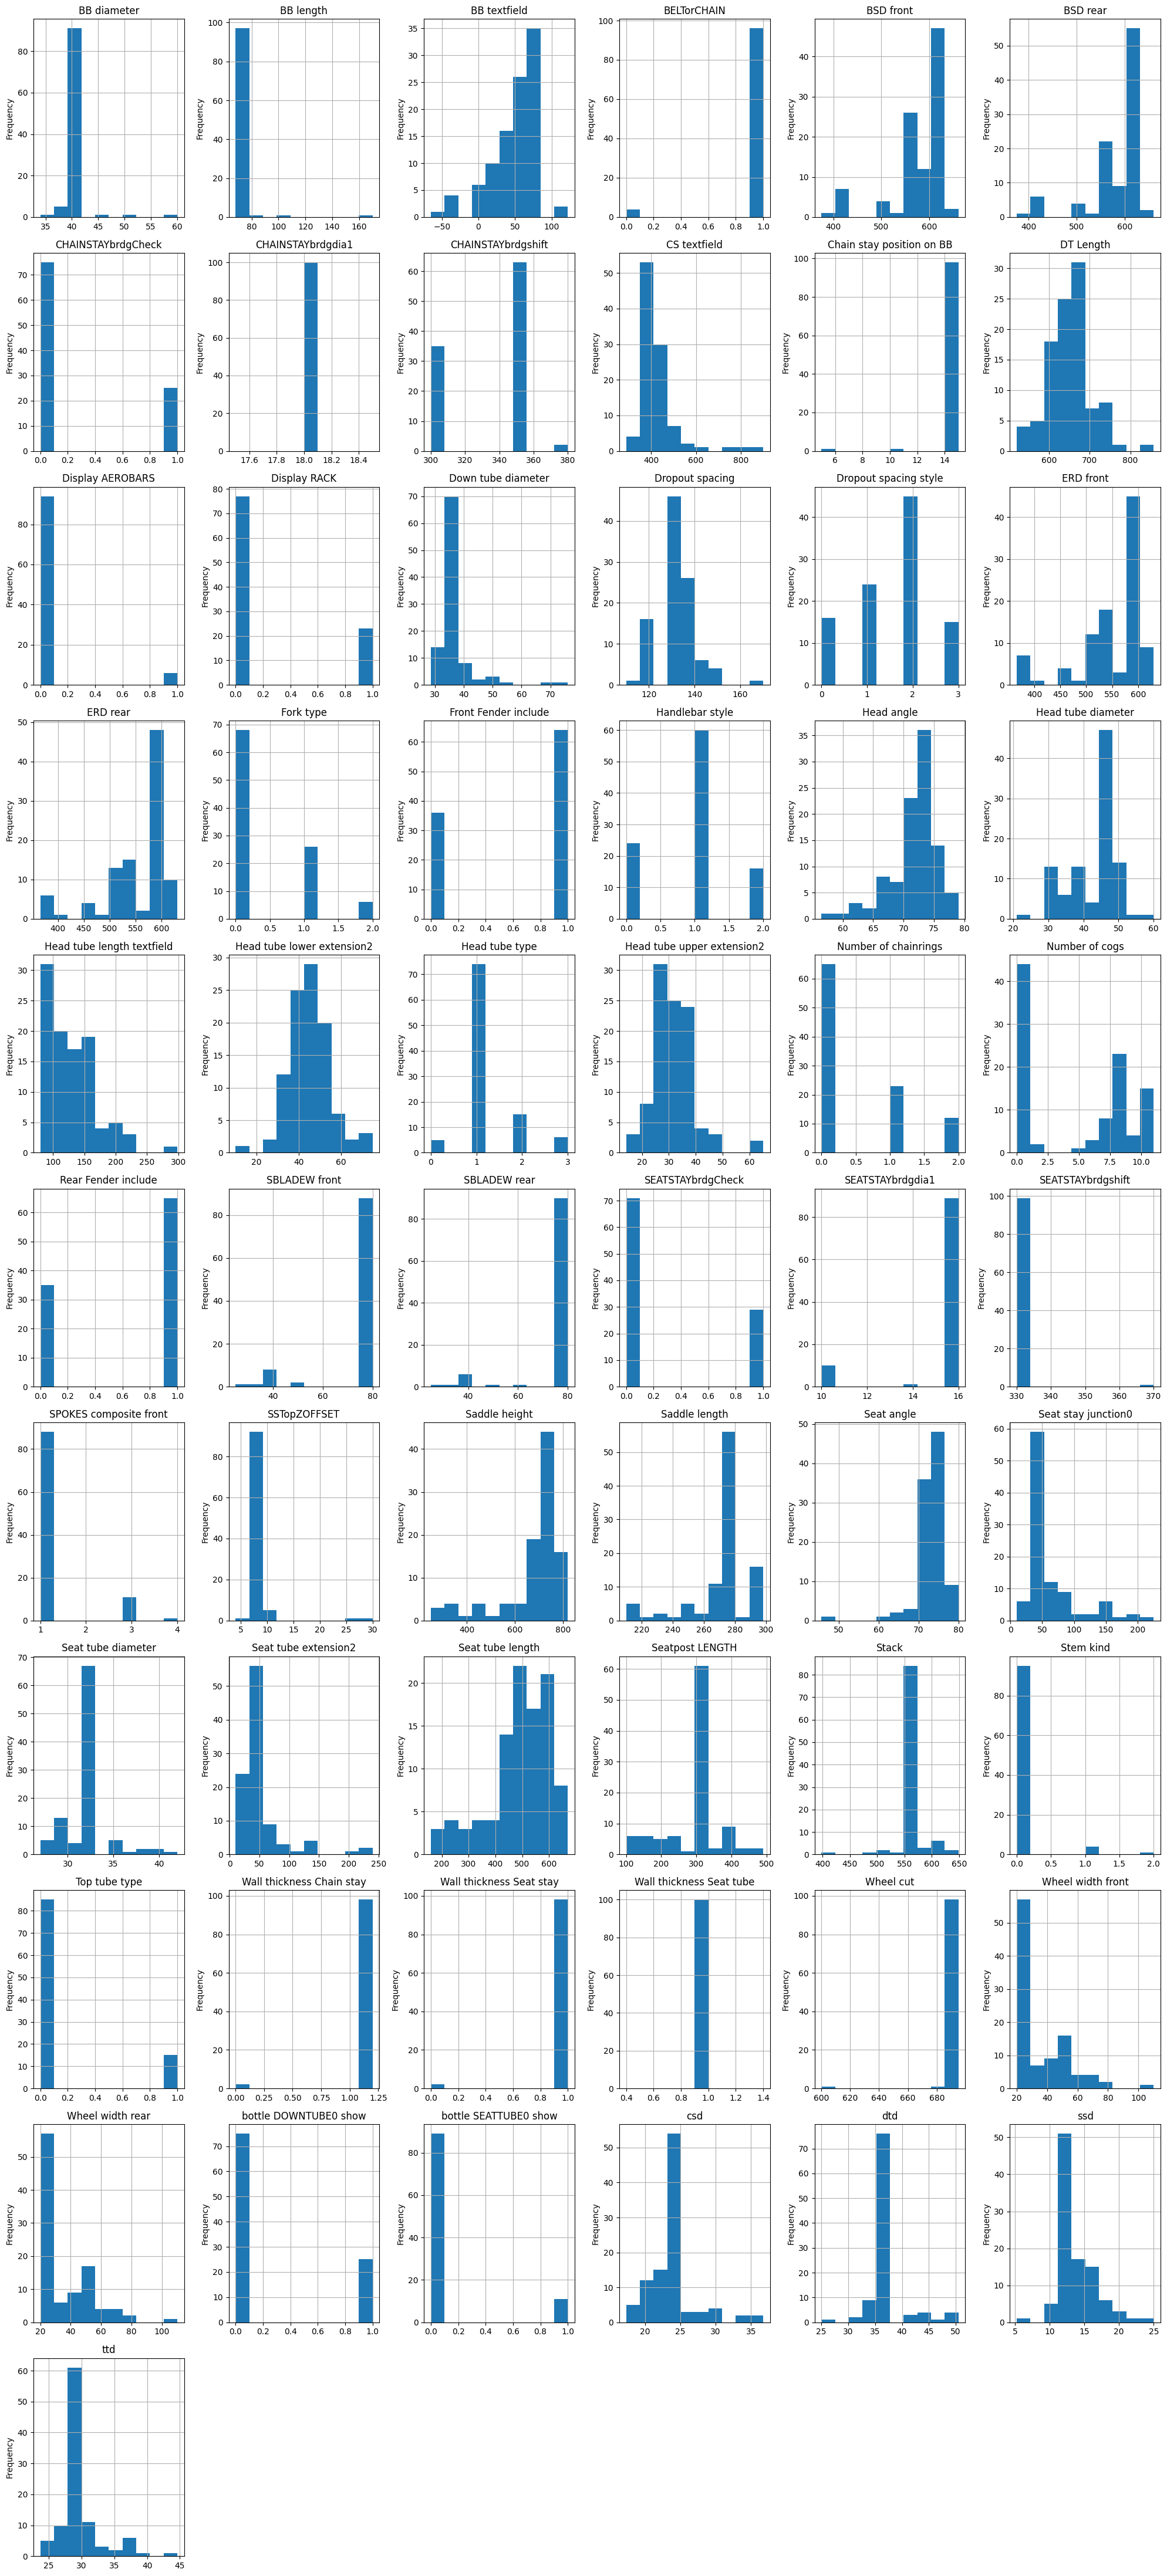

In [7]:
plot_bins(all_my_bikes_df, "all_bikes_hist")